<a href="https://colab.research.google.com/github/navidyamini/TensorFlow2.0_Codes/blob/main/code/TF2_ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [31]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # Uniformaly distibuted between (-3, +3)
Y = np.cos(2*X[:,0] + np.cos(3*X[:,1]))

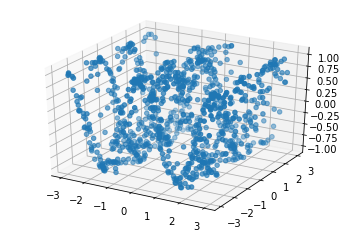

In [32]:
#Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
# plt.show()

In [33]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

In [34]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5269
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4763
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4573
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4352
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4274
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3795
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3339
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3103
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2769
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2587
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2441
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2407
Epoch 13/100
32/32 [=================

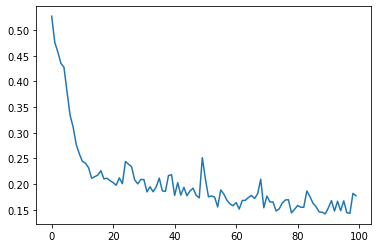

In [35]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

79/79 [==============================] - 0s 4ms/step


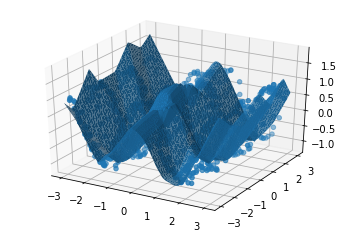

In [36]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3 , 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

79/79 [==============================] - 0s 2ms/step


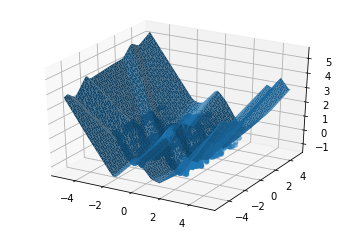

In [38]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()